In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
#from catboost import CatBoostClassifier, Pool
from sklearn.metrics import plot_confusion_matrix, accuracy_score, plot_roc_curve, confusion_matrix
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import os
import warnings

from sklearn.metrics import f1_score 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import STOPWORDS, WordCloud

warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
trainFile = 'train.tsv'
testFile = 'test.tsv'
valFile = 'valid.tsv'

In [3]:
traindata = pd.read_csv(trainFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
traindata.name = 'Training Data'

testdata = pd.read_csv(testFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
testdata.name = 'Testing Data'

valdata = pd.read_csv(valFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "job title", "state", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
valdata.name = 'Validation Data'

In [ ]:
print(traindata.shape)
print(testdata.shape)
print(valdata.shape)

(10240, 14)
(1267, 14)
(1284, 14)


In [ ]:
from nltk.corpus import stopwords
import string
def process_text(s):
    #removes punctuation from strings and joins adjacent strings tgt
    nopunc = [char for char in s if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #lowercase all strings
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [4]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
traindata['Clean Statements'] = traindata['statement'].apply(process_text)
testdata['Clean Statements'] = testdata['statement'].apply(process_text)
valdata['Clean Statements'] = valdata['statement'].apply(process_text)
traindata.sample(5)

,json ID,label,statement,subject,speaker,job title,state,party,barely true,false,half true,mostly true,pants on fire,los,Clean Statements
8991,1703.json,half-true,"Passage of Clinton budget bill in 1993 ""led to...","economy,federal-budget,history,taxes,abc-news-...",bill-clinton,former president,Arkansas,democrat,4.0,2.0,12.0,11.0,3.0,an interview on ABC's This Week,"[Passage, Clinton, budget, bill, 1993, led, en..."
5798,3548.json,false,On bipartisan redistricting.,redistricting,thomas-norment-jr,"Minority leader, Virginia Senate",Virginia,republican,0.0,1.0,0.0,0.0,0.0,a press release.,"[bipartisan, redistricting]"
3064,11055.json,barely-true,Says President Obama is reducing our naval fle...,"federal-budget,military",ew-jackson,Pastor,Virginia,republican,1.0,0.0,0.0,1.0,0.0,a news release.,"[Says, President, Obama, reducing, naval, flee..."
2374,12688.json,mostly-true,Says middle-class New York State residents wil...,taxes,andrew-cuomo,Governor,New York,democrat,1.0,0.0,0.0,1.0,0.0,a press conference and several other recent pu...,"[Says, middleclass, New, York, State, resident..."
2662,7668.json,true,The NRA used to support expanded background ch...,guns,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,remarks in the White House Rose Garden,"[NRA, used, support, expanded, background, che..."


In [ ]:

np.random.seed(42)

In [ ]:
traindata.head()

,json ID,label,statement,subject,speaker,job title,state,party,barely true,false,half true,mostly true,pants on fire,los,Clean Statements
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,"[Says, Annies, List, political, group, support..."
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"[decline, coal, start, started, natural, gas, ..."
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,"[Hillary, Clinton, agrees, John, McCain, votin..."
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,"[Health, care, reform, legislation, likely, ma..."
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"[economic, turnaround, started, end, term]"


In [ ]:
def plot_save_wordcloud(dataset, title):
    if not os.path.isdir('./figures'):
        os.makedirs('figures')

    text = dataset['Clean Statements'].values
    wordcloud = WordCloud(
        width=3000, height=2000, background_color='white',
        stopwords=STOPWORDS).generate(str(text))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title('{}'.format(title))
    title = title.replace(' ', '_')
    plt.savefig('./figures/word_cloud_' + title)
    plt.show()

In [ ]:
def create_word_cloud(dataset, dataset_name):
    """Function to create the wordcloud of the complete dataset as well as
    for only the true labels as well as for false labels of the dataset.

    Parameters:
    -----------
    dataset: pandas dataframe
        The dataset whose wordcloud is to be formed.
    dataset_name: string
        The name of the dataset.
    """
    title = 'The wordcloud of the complete ' + dataset_name
    plot_save_wordcloud(dataset, title)

    # Plotting the wordcloud for the true labels only
    true_dataset = dataset[dataset['label'].astype(str) == 'true']
    title = 'The wordcloud of the true labels of ' + dataset_name
    plot_save_wordcloud(true_dataset, title)

    # Plotting the wordcloud for the half-true labels only
    half_true_dataset = dataset[dataset['label'].astype(str) == 'half-true']
    title = 'The wordcloud of the half-true labels of ' + dataset_name
    plot_save_wordcloud(half_true_dataset, title)

    # Plotting the wordcloud for the mostly-true labels only
    mostly_true_dataset = dataset[dataset['label'].astype(str) == 'mostly-true']
    title = 'The wordcloud of the mostly-true labels of ' + dataset_name
    plot_save_wordcloud(mostly_true_dataset, title)

    # Plotting the wordcloud for the barely-true labels only
    barely_true_dataset = dataset[dataset['label'].astype(str) == 'barely-true']
    title = 'The wordcloud of the barely-true labels of ' + dataset_name
    plot_save_wordcloud(barely_true_dataset, title)

    # Plotting the wordcloud for the false labels only
    false_dataset = dataset[dataset['label'].astype(str) == 'false']
    title = 'The wordcloud of the false labels of ' + dataset_name
    plot_save_wordcloud(false_dataset, title)

    # Plotting the wordcloud for the pants-fire labels only
    pants_fire_dataset = dataset[dataset['label'].astype(str) == 'pants-fire']
    title = 'The wordcloud of the pants-fire labels of ' + dataset_name
    plot_save_wordcloud(pants_fire_dataset, title)

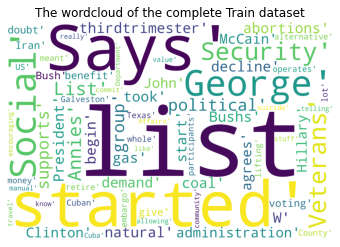

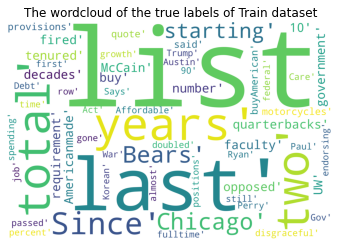

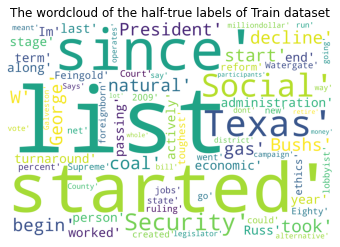

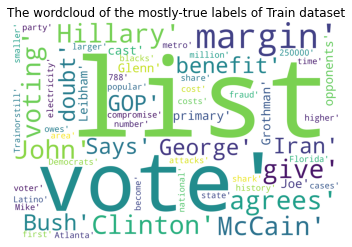

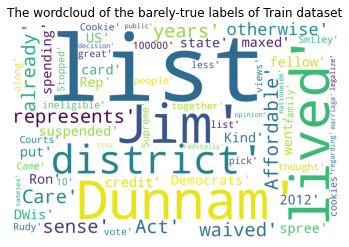

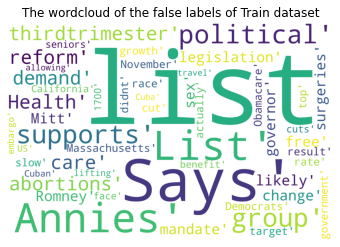

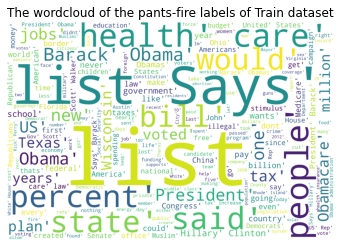

In [ ]:
create_word_cloud(traindata, 'Train dataset')

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
countV = CountVectorizer()
trainset = pd.concat([traindata], ignore_index = True)
# train_count = countV.fit_transform(traindata['Clean Statements'].values)

In [ ]:
print(countV)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [ ]:
def process_text(s):
    #removes punctuation from strings and joins adjacent strings tgt
    nopunc = [char for char in s if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    #lowercase all strings
    clean_string = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return clean_string

In [ ]:
stopwords_list = list(stopwords.words('english'))

In [ ]:
countV = CountVectorizer()
train_count = countV.fit_transform(traindata['statement'].values)

In [ ]:
print(countV.vocabulary_)

{'says': 9676, 'the': 10988, 'annies': 1044, 'list': 6639, 'political': 8376, 'group': 5115, 'supports': 10709, 'third': 11036, 'trimester': 11296, 'abortions': 615, 'on': 7728, 'demand': 3278, 'when': 11934, 'did': 3434, 'decline': 3185, 'of': 7672, 'coal': 2475, 'start': 10425, 'it': 6052, 'started': 10426, 'natural': 7418, 'gas': 4860, 'took': 11138, 'off': 7674, 'that': 10980, 'to': 11110, 'begin': 1532, 'in': 5687, 'president': 8554, 'george': 4910, 'bushs': 1964, 'administration': 751, 'hillary': 5401, 'clinton': 2444, 'agrees': 856, 'with': 12027, 'john': 6133, 'mccain': 6967, 'by': 1989, 'voting': 11748, 'give': 4954, 'bush': 1962, 'benefit': 1569, 'doubt': 3684, 'iran': 5999, 'health': 5310, 'care': 2096, 'reform': 9099, 'legislation': 6502, 'is': 6014, 'likely': 6605, 'mandate': 6834, 'free': 4735, 'sex': 9923, 'change': 2256, 'surgeries': 10721, 'economic': 3842, 'turnaround': 11351, 'at': 1259, 'end': 3990, 'my': 7374, 'term': 10939, 'chicago': 2313, 'bears': 1506, 'have': 

In [ ]:
nb_pipeline0 = Pipeline([
    #('nb_CV', CountVectorizer(analyzer = process_text, lowercase=True, ngram_range=(1, 4))),
    ('nb_CV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 4))),
    ('nb_clf', MultinomialNB(alpha=6.8))
])
nb_pipeline0.fit(traindata['statement'], traindata['label'])
prediction0 = nb_pipeline0.predict(testdata['statement'])

In [ ]:
print(traindata['Clean Statements'])

0        [Says, Annies, List, political, group, support...
1        [decline, coal, start, started, natural, gas, ...
2        [Hillary, Clinton, agrees, John, McCain, votin...
3        [Health, care, reform, legislation, likely, ma...
4               [economic, turnaround, started, end, term]
                               ...                        
10235    [larger, number, shark, attacks, Florida, case...
10236    [Democrats, become, party, Atlanta, metro, are...
10237    [Says, alternative, Social, Security, operates...
10238    [lifting, US, Cuban, embargo, allowing, travel...
10239    [Department, Veterans, Affairs, manual, tellin...
Name: Clean Statements, Length: 10240, dtype: object


In [ ]:
# print(traindata['label'].shape)
# print(prediction0.shape)
for x in prediction0:
  print(x)
pd.Series(prediction0).value_counts()
#print(prediction0)
# print(testdata.shape)

half-true
half-true
half-true
half-true
false
half-true
mostly-true
half-true
mostly-true
barely-true
half-true
half-true
half-true
mostly-true
half-true
half-true
false
mostly-true
mostly-true
half-true
half-true
mostly-true
half-true
mostly-true
false
half-true
half-true
half-true
half-true
mostly-true
false
mostly-true
half-true
false
half-true
half-true
false
half-true
half-true
half-true
false
half-true
half-true
half-true
mostly-true
half-true
half-true
mostly-true
false
false
half-true
half-true
half-true
half-true
mostly-true
half-true
half-true
half-true
mostly-true
half-true
half-true
false
half-true
half-true
mostly-true
half-true
barely-true
half-true
half-true
half-true
half-true
half-true
mostly-true
half-true
mostly-true
mostly-true
false
barely-true
half-true
mostly-true
half-true
half-true
mostly-true
mostly-true
half-true
half-true
mostly-true
half-true
half-true
mostly-true
half-true
half-true
half-true
half-true
true
mostly-true
half-true
half-true
mostly-true
half-

half-true      693
mostly-true    290
false          207
barely-true     49
true            28
dtype: int64

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score)

y_pred0 = nb_pipeline0.predict(testdata['statement'])
y_true0 = testdata['label']
accuracy = accuracy_score(y_true0, y_pred0)
f1 = f1_score(y_true0, y_pred0, average='micro')
precision = precision_score(y_true0, y_pred0, average='micro')
recall = recall_score(y_true0, y_pred0, average='micro')
    
print('Report for ---> {}'.format("MNB Vectorizer"))
print('Accuracy is: {}'.format(accuracy))
print('F1 score is: {}'.format(f1))
print('Precision score is: {}'.format(precision))
print('Recall score is: {}'.format(recall))

Report for ---> MNB Vectorizer
Accuracy is: 0.23125493291239146
F1 score is: 0.23125493291239146
Precision score is: 0.23125493291239146
Recall score is: 0.23125493291239146


In [ ]:
from sklearn import preprocessing
def transformtoBinary(s):
  news = "a"
  if s == 'half-true' or s == 'barely-true' or s== 'true' or s == 'mostly-true':
    news = 'true'
  else:
    news = 'false'
  return news
traindata['bilabel'] = traindata['label'].apply(transformtoBinary)
testdata['bilabel'] = traindata['label'].apply(transformtoBinary)


In [ ]:
def transformtoBinary2(s):
  news = "a"
  if s== 'true' or s == 'mostly-true':
    news = 'true'
  else:
    news = 'false'
  return news
traindata['bilabel2'] = traindata['label'].apply(transformtoBinary2)
testdata['bilabel2'] = traindata['label'].apply(transformtoBinary2)

In [ ]:
model = MultinomialNB(alpha = 6.8)
# nb_pipeline = Pipeline([ 
#     ('nb_CV', CountVectorizer(stop_words=stopwords_list, lowercase=True, ngram_range=(1, 4))),
#     ('nb_clf', model)
# ])
cv = CountVectorizer(stop_words=stopwords_list, lowercase=True)
traindatatemp = traindata
traindatatemp.head()

,json ID,label,statement,subject,speaker,job title,state,party,barely true,false,half true,mostly true,pants on fire,los,Clean Statements,bilabel,bilabel2
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,"[Says, Annies, List, political, group, support...",false,false
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"[decline, coal, start, started, natural, gas, ...",true,false
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,"[Hillary, Clinton, agrees, John, McCain, votin...",true,true
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,"[Health, care, reform, legislation, likely, ma...",false,false
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"[economic, turnaround, started, end, term]",true,false


In [ ]:

# X_train = np.asarray(traindatatemp[['statement', 'subject', 'subject', 'speaker', 'state', 'party']])
# y_train = np.asarray(traindatatemp['bilabel'])

# X_test = np.asarray(testdata[['statement', 'subject', 'subject', 'speaker', 'state', 'party']])
# y_test = np.asarray(testdata['bilabel'])

X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

model.fit(X_train,y_train)
pred = model.predict(X_test)
#X = np.asarray(df[['city', 'num_employees', 'store', 'units_sold']])


In [ ]:
# traindatatemp = cv.fit_transform(traindata['statement', 'subject', 'speaker', 'job title', 'state', 'party', 'los'])
# model.fit(traindata, traindata['bilabel'])

In [ ]:
y_pred = nb_pipeline.predict(testdata['statement'])
y_true = testdata['bilabel']
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average = 'weighted')
precision = precision_score(y_true, y_pred, average = 'weighted')
recall = recall_score(y_true, y_pred, average = 'weighted')
accuracy = accuracy_score(y_true, y_pred)
    
print('Report for ---> {}'.format("MNB Vectorizer - Binary Classfication"))
print('Accuracy is: {}'.format(accuracy))
print('F1 score is: {}'.format(f1))
print('Precision score is: {}'.format(precision))
print('Recall score is: {}'.format(recall))



In [ ]:
traindata['bilabel'].head

<bound method NDFrame.head of 0        false
1         true
2         true
3        false
4         true
         ...  
10235     true
10236     true
10237     true
10238    false
10239    false
Name: bilabel, Length: 10240, dtype: object>

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(y_pred)

['true' 'true' 'false' ... 'true' 'false' 'true']


In [ ]:
print(testdata['label'])

0              true
1             false
2             false
3         half-true
4        pants-fire
           ...     
1262      half-true
1263    barely-true
1264    barely-true
1265    barely-true
1266          false
Name: label, Length: 1267, dtype: object


In [ ]:
y_pred2 = nb_pipeline.predict(testdata['statement'])
y_true2 = testdata['bilabel2']
accuracy = accuracy_score(y_true2, y_pred2)
f1 = f1_score(y_true2, y_pred2, average = 'weighted')
precision = precision_score(y_true2, y_pred2, average = 'weighted')
recall = recall_score(y_true2, y_pred2, average = 'weighted')
accuracy = accuracy_score(y_true2, y_pred2)
    
print('Report for ---> {}'.format("MNB Vectorizer - Binary Classfication"))
print('Accuracy is: {}'.format(accuracy))
print('F1 score is: {}'.format(f1))
print('Precision score is: {}'.format(precision))
print('Recall score is: {}'.format(recall))

Report for ---> MNB Vectorizer - Binary Classfication
Accuracy is: 0.4277821625887924
F1 score is: 0.39261720424515384
Precision score is: 0.5525045567959042
Recall score is: 0.4277821625887924


In [ ]:
# print(y_pred2.shape)
# print(y_true2.shape)

In [ ]:
# from sklearn.metrics import confusion_matrix
# cm1 = confusion_matrix(y_true, y_pred)
# print(cm1)

In [ ]:
# cm2 = confusion_matrix(y_true2, y_pred2)
# print(cm2)

[[  1 811]
 [  0 455]]


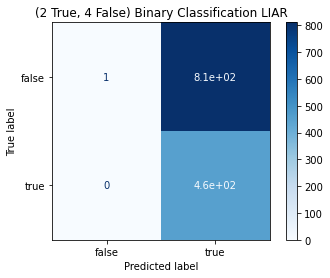

In [ ]:
from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(nb_pipeline, testdata['statement'], testdata['bilabel2'] ,cmap=plt.cm.Blues)
disp.ax_.set_title("(2 True, 4 False) Binary Classification LIAR")

print(disp.confusion_matrix)

In [ ]:
print(y_pred.shape)
print(y_true.shape)

(1267,)
(1267,)


[[  0 364]
 [  1 902]]


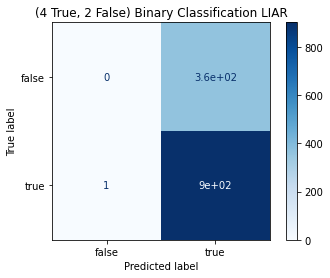

In [ ]:
disp = plot_confusion_matrix(nb_pipeline, testdata['statement'], testdata['bilabel'] ,cmap=plt.cm.Blues)
disp.ax_.set_title("(4 True, 2 False) Binary Classification LIAR")

print(disp.confusion_matrix)

[[ 11  44 123  30   0   4]
 [ 12  52 124  55   0   6]
 [ 12  27 157  65   0   4]
 [  6  23 141  65   0   6]
 [  6  29  42  15   0   0]
 [  2  32 106  60   0   8]]


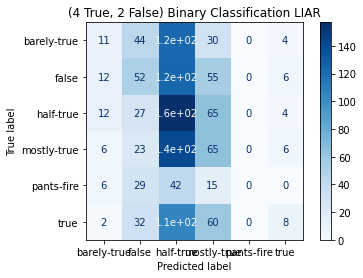

In [ ]:
disp = plot_confusion_matrix(nb_pipeline0, testdata['statement'], testdata['label'] ,cmap=plt.cm.Blues)
disp.ax_.set_title("(4 True, 2 False) Binary Classification LIAR")

print(disp.confusion_matrix)

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
traindata2 = pd.read_csv(trainFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
traindata2.name = 'Training Data'

testdata2 = pd.read_csv(testFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
testdata2.name = 'Testing Data'

valdata2 = pd.read_csv(valFile, delimiter='\t', encoding='utf-8', names=
                        ["json ID", "label", "statement", "subject", "speaker", "speaker_job_title", "state_info", "party",
                         "barely true", "false", "half true", "mostly true", "pants on fire", "los"])
valdata2.name = 'Validation Data'

In [6]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
def pre_process_text(text):
  text = text.lower()
  text_p = "".join([char for char in text if char not in string.punctuation])

  words = word_tokenize(text_p)

  stop_words = stopwords.words('english')
  filtered_words = [word for word in words if word not in stop_words]

  # porter = PorterStemmer()
  # stemmed = [porter.stem(word) for word in filtered_words]
  
  # pos = pos_tag(filtered_words)
  
  return ' '.join(filtered_words)

In [8]:
traindata2.head()

import string

In [9]:
traindata2.head()

,json ID,label,statement,subject,speaker,speaker_job_title,state_info,party,barely true,false,half true,mostly true,pants on fire,los
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [10]:
def one_hot_encode(df):
    dummies = df['subject'].str.get_dummies(sep=",")
    df_copy = pd.concat([df.drop('subject', 1), dummies], 1)
    return df_copy

In [12]:

traindata2.dropna(axis=0, how='all', subset=['subject'], inplace=True)
traindata2.dropna(axis=0, how='all', subset=['speaker'], inplace=True)
traindata2.dropna(axis=0, how='all', subset=['party'], inplace=True)
traindata2 = traindata2.reset_index(drop=True)
X_train, y_train = traindata2.drop(['label','speaker_job_title', 'state_info', 'json ID', 'los'], axis=1), traindata2['label']
X_val, y_val = valdata2.drop(['label', 'speaker_job_title', 'state_info', 'json ID', 'los'], axis=1), valdata2['label']
X_test, y_test = testdata2.drop(['label','speaker_job_title', 'state_info', 'json ID', 'los'], axis=1), testdata2['label']

In [ ]:
train_NaN = X_train.isna().sum().to_dict()

# plt.xticks(rotation=90)
# plt.bar(train_NaN.keys(), train_NaN.values(), align='edge')
print(train_NaN)

{'statement': 0, 'subject': 0, 'speaker': 0, 'party': 0, 'barely true': 0, 'false': 0, 'half true': 0, 'mostly true': 0, 'pants on fire': 0}


In [13]:
# traindata2.dropna(axis=0, how='all', subset=['subject'], inplace=True)
# traindata2.dropna(axis=0, how='all', subset=['speaker'], inplace=True)
# traindata2.dropna(axis=0, how='all', subset=['party'], inplace=True)
# X_train, y_train = traindata2.drop(['label','speaker_job_title', 'state_info', 'json ID', 'los'], axis=1), traindata2['label']
# X_val, y_val = valdata2.drop(['label', 'speaker_job_title', 'state_info', 'json ID', 'los'], axis=1), valdata2['label']
# X_test, y_test = testdata2.drop(['label','speaker_job_title', 'state_info', 'json ID', 'los'], axis=1), testdata2['label']


cat_features = ['subjects', 'speaker', 'party_affiliation']
text_features = ['statement', 'context']

X_train[['statement']] = X_train['statement'].apply(lambda text: pd.Series(pre_process_text(text)))
X_val[['statement']] = X_val['statement'].apply(lambda text: pd.Series(pre_process_text(text)))
X_test[['statement']] = X_test['statement'].apply(lambda text: pd.Series(pre_process_text(text)))


tfidfvectorizer = TfidfVectorizer(analyzer='word' , stop_words='english',)
X_train_new_statement = tfidfvectorizer.fit_transform(X_train['statement'])
tfid_columns = ['tfid_' + x for x in tfidfvectorizer.get_feature_names()]
X_train_new_statement = pd.DataFrame(X_train_new_statement.toarray(), columns=tfid_columns)
X_train = pd.concat([X_train, X_train_new_statement], axis=1)
X_train.drop(['statement'], axis = 1, inplace = True)


X_val_new_statement = tfidfvectorizer.transform(X_val['statement'])
X_val_new_statement = pd.DataFrame(X_val_new_statement.toarray(), columns=tfid_columns)
X_val = pd.concat([X_val, X_val_new_statement], axis=1)
X_val.drop(['statement'], axis = 1, inplace = True)


X_test_new_statement = tfidfvectorizer.transform(X_test['statement'])
X_test_new_statement = pd.DataFrame(X_test_new_statement.toarray(), columns=tfid_columns)
X_test = pd.concat([X_test, X_test_new_statement], axis=1)
X_test.drop(['statement'], axis = 1, inplace = True)


# c_vec = CountVectorizer(analyzer = pre_process_text)
# X_train['statement'] = c_vec.fit_transform(X_train['statement'])
# X_val['statement'] = c_vec.transform(X_val['statement'])
# X_test['statement'] = c_vec.transform(X_test['statement'])

model = MultinomialNB(alpha = 6.8)
# X_train.drop(['statement'], axis = 1 , inplace = True)
# X_val.drop(['statement'], axis = 1, inplace = True)
# X_test.drop(['statement'], axis = 1, inplace = True)
X_train = one_hot_encode(X_train)
X_test = one_hot_encode(X_test)


# X_train
dummies = pd.get_dummies(X_train['party'], prefix='party')
X_train = pd.concat([X_train.drop(['party'], axis=1), dummies], axis=1)

dummies = pd.get_dummies(X_train['speaker'], prefix='speaker')
X_train = pd.concat([X_train.drop(['speaker'], axis=1), dummies], axis=1)

# X_test
dummies = pd.get_dummies(X_test['party'], prefix='party')
X_test = pd.concat([X_test.drop(['party'], axis=1), dummies], axis=1)

dummies = pd.get_dummies(X_test['speaker'], prefix='speaker')
X_test = pd.concat([X_test.drop(['speaker'], axis=1), dummies], axis=1)

# dummies = pd.get_dummies(train['los'], prefix='los')
# X_train = pd.concat([train.drop(['los'], axis=1), dummies], axis=1)

party_affiliation_columns = dummies.columns

#Filling in missing columns for X_Test
# Get missing columns in the training test
missing_cols = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred)



['half-true' 'half-true' 'false' ... 'true' 'half-true' 'half-true']


In [16]:
pred = model.predict(X_test)

In [17]:
print(accuracy_score(y_test, pred))

0.31333859510655093


In [ ]:
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score)
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test, pred, average = 'weighted')
precision = precision_score(y_test, pred, average = 'weighted')
recall = recall_score(y_test, pred, average = 'weighted')
    
print('Report for ---> {}'.format("MNB Vectorizer - Binary Classfication"))
print('Accuracy is: {}'.format(accuracy))
print('F1 score is: {}'.format(f1))
print('Precision score is: {}'.format(precision))
print('Recall score is: {}'.format(recall))

Report for ---> MNB Vectorizer - Binary Classfication
Accuracy is: 0.31333859510655093
F1 score is: 0.2692123396540594
Precision score is: 0.3322267967558234
Recall score is: 0.31333859510655093


[[ 15  69 100  22   1   5]
 [ 13 125  75  25   7   4]
 [  6  49 166  38   0   6]
 [  2  33 133  65   0   8]
 [  4  54  16   2  16   0]
 [  8  40  99  48   3  10]]


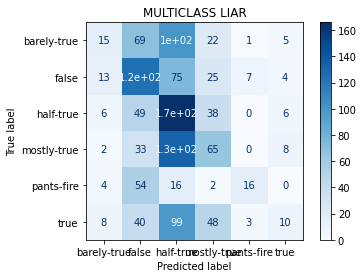

In [ ]:
disp = plot_confusion_matrix(model, X_test, y_test ,cmap=plt.cm.Blues)
disp.ax_.set_title("MULTICLASS LIAR")

print(disp.confusion_matrix)

1267
half-true      265
false          249
mostly-true    241
barely-true    212
true           208
pants-fire      92
Name: label, dtype: int64


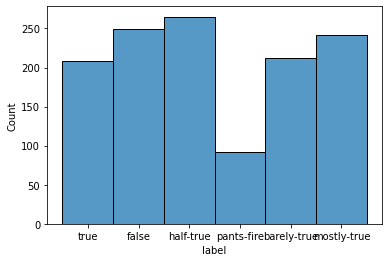

In [ ]:
print(len(y_test))
sns.histplot(data=y_test)
print(y_test.value_counts())

In [ ]:
plot_roc_curve(model, X_test, y_test)

ValueError: ignored

In [ ]:
#####4 TRUE 2 FALSE######
label_map = {'false': 'false', 'half-true': 'true', 'mostly-true': 'true', 'true': 'true', 'barely-true': 'true', 'pants-fire': 'false'}
y_train = traindata2['label'].map(label_map)
y_test = testdata2['label'].map(label_map)

model.fit(X_train, y_train)



MultinomialNB(alpha=6.8, class_prior=None, fit_prior=True)

In [ ]:
pred = model.predict(X_test)
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test, pred, average = 'weighted')
precision = precision_score(y_test, pred, average = 'weighted')
recall = recall_score(y_test, pred, average = 'weighted')
    
print('Report for ---> {}'.format("MNB Vectorizer - Binary Classfication"))
print('Accuracy is: {}'.format(accuracy))
print('F1 score is: {}'.format(f1))
print('Precision score is: {}'.format(precision))
print('Recall score is: {}'.format(recall))

Report for ---> MNB Vectorizer - Binary Classfication
Accuracy is: 0.7624309392265194
F1 score is: 0.7261839206079506
Precision score is: 0.7406096150676897
Recall score is: 0.7624309392265194


[[ 93 248]
 [ 53 873]]


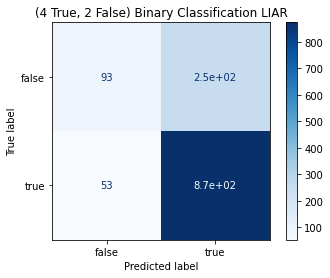

In [ ]:
disp = plot_confusion_matrix(model, X_test, y_test ,cmap=plt.cm.Blues)
disp.ax_.set_title("(4 True, 2 False) Binary Classification LIAR")

print(disp.confusion_matrix)

1267
true     926
false    341
Name: label, dtype: int64


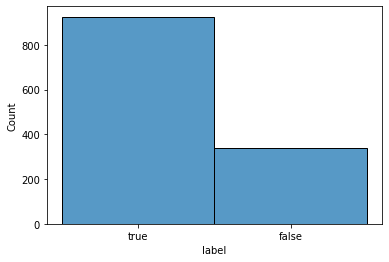

In [ ]:
print(len(y_test))
sns.histplot(data=y_test)
print(y_test.value_counts())

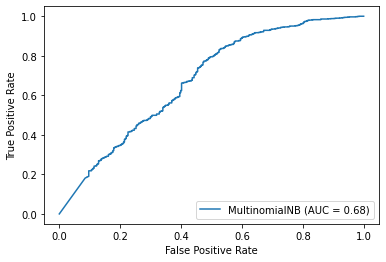

In [ ]:
plot_roc_curve(model, X_test, y_test)

In [18]:
####### 2 TRUE 4 FALSE ########

label_map = {'false': 'false', 'half-true': 'false', 'mostly-true': 'true', 'true': 'true', 'barely-true': 'false', 'pants-fire': 'false'}
y_train = traindata2['label'].map(label_map)
y_test = testdata2['label'].map(label_map)

model.fit(X_train, y_train)

MultinomialNB(alpha=6.8, class_prior=None, fit_prior=True)

In [20]:
pred = model.predict(X_train)
print(accuracy_score(y_train, pred))

0.7064856417268998


In [ ]:
pred = model.predict(X_test)
accuracy = accuracy_score(y_test,pred)
f1 = f1_score(y_test, pred, average = 'weighted')
precision = precision_score(y_test, pred, average = 'weighted')
recall = recall_score(y_test, pred, average = 'weighted')
    
print('Report for ---> {}'.format("MNB Vectorizer - Binary Classfication"))
print('Accuracy is: {}'.format(accuracy))
print('F1 score is: {}'.format(f1))
print('Precision score is: {}'.format(precision))
print('Recall score is: {}'.format(recall))

Report for ---> MNB Vectorizer - Binary Classfication
Accuracy is: 0.664561957379637
F1 score is: 0.6261797630315661
Precision score is: 0.6403506659354236
Recall score is: 0.664561957379637


[[723  95]
 [330 119]]


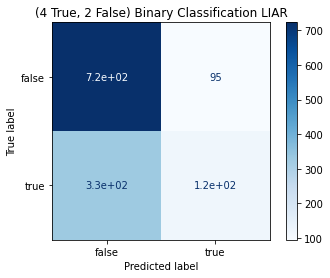

In [ ]:
disp = plot_confusion_matrix(model, X_test, y_test ,cmap=plt.cm.Blues)
disp.ax_.set_title("(4 True, 2 False) Binary Classification LIAR")

print(disp.confusion_matrix)

1267
false    818
true     449
Name: label, dtype: int64


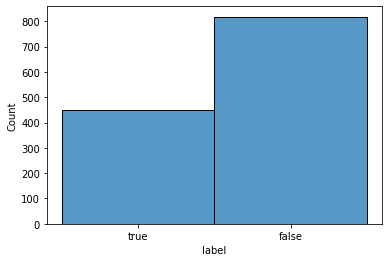

In [ ]:
print(len(y_test))
sns.histplot(data=y_test)
print(y_test.value_counts())

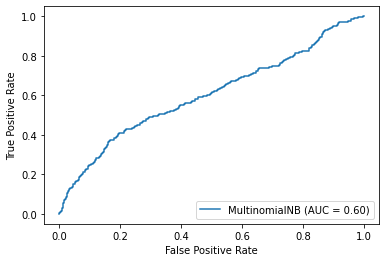

In [ ]:
plot_roc_curve(model, X_test, y_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_train.columns[13582])
print(X_test.columns[13582])

(10238, 16172)
(1267, 16172)
speaker_brian-kemp
speaker_brian-kemp


In [ ]:
X_test.head()
#pred = model.predict(X_test)
#print (pred)


,barely true,false,half true,mostly true,pants on fire,tfid_005,tfid_01,tfid_02,tfid_025,tfid_03,tfid_04,tfid_047,tfid_05,tfid_06,tfid_07,tfid_0809,tfid_09,tfid_10,tfid_100,tfid_1000,tfid_10000,tfid_100000,tfid_100000000,tfid_100000the,tfid_1000plus,tfid_100billion,tfid_100million,tfid_100plus,tfid_100round,tfid_100th,tfid_100watt,tfid_100yearold,tfid_1010,tfid_1017,tfid_102000,tfid_103,tfid_103000,tfid_1033,tfid_1034,tfid_104,...,speaker_william-weld,speaker_wilton-gregory,speaker_winning-democrats,speaker_winning-our-future,speaker_wisconsin-alliance-reform,speaker_wisconsin-anti-violence-effort-educational-fund,speaker_wisconsin-association-justice,speaker_wisconsin-contractor-coalition,speaker_wisconsin-corn-growers-association,speaker_wisconsin-education-association-council,speaker_wisconsin-family-action,speaker_wisconsin-humane-society,speaker_wisconsin-institute-law-liberty,speaker_wisconsin-jobs-now,speaker_wisconsin-manufacturers-and-commerce,speaker_wisconsin-medical-society,speaker_wisconsin-professional-police-association,speaker_wisconsin-sierra-club,speaker_wisconsin-state-afl-cio,speaker_wisconsin-transportation-builders-association,speaker_women-wall,speaker_woody-degan,speaker_workers-voice,speaker_worldnetdaily,speaker_wrongwayrubiocom,speaker_xavier-becerra,speaker_xi-jinping,speaker_yard-sign,speaker_yes-62-death-penalty-repeal,speaker_yes-82-and-83-campaign,speaker_yes-84,speaker_yg-action-fund,speaker_yolanda-adrean,speaker_young-americans-liberty,speaker_young-conservatives-texas,speaker_yvette-mcgee-brown,speaker_zack-space,speaker_zell-miller,speaker_zephyr-teachout,speaker_zoe-lofgren
0,30,30,42,23,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,63,114,51,37,61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,2,2,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


{'barely true': 0, 'false': 0, 'half true': 0, 'mostly true': 0, 'pants on fire': 0, 'tfid_005': 0, 'tfid_01': 0, 'tfid_02': 0, 'tfid_025': 0, 'tfid_03': 0, 'tfid_04': 0, 'tfid_047': 0, 'tfid_05': 0, 'tfid_06': 0, 'tfid_07': 0, 'tfid_0809': 0, 'tfid_09': 0, 'tfid_10': 0, 'tfid_100': 0, 'tfid_1000': 0, 'tfid_10000': 0, 'tfid_100000': 0, 'tfid_100000000': 0, 'tfid_100000the': 0, 'tfid_1000plus': 0, 'tfid_100billion': 0, 'tfid_100million': 0, 'tfid_100plus': 0, 'tfid_100round': 0, 'tfid_100th': 0, 'tfid_100watt': 0, 'tfid_100yearold': 0, 'tfid_1010': 0, 'tfid_1017': 0, 'tfid_102000': 0, 'tfid_103': 0, 'tfid_103000': 0, 'tfid_1033': 0, 'tfid_1034': 0, 'tfid_104': 0, 'tfid_104000': 0, 'tfid_10420': 0, 'tfid_1045': 0, 'tfid_105': 0, 'tfid_106': 0, 'tfid_106258': 0, 'tfid_107': 0, 'tfid_1070': 0, 'tfid_10728': 0, 'tfid_108': 0, 'tfid_109': 0, 'tfid_10932json': 0, 'tfid_10billion': 0, 'tfid_10in': 0, 'tfid_10million': 0, 'tfid_10percent': 0, 'tfid_10th': 0, 'tfid_10year': 0, 'tfid_10yearold': 

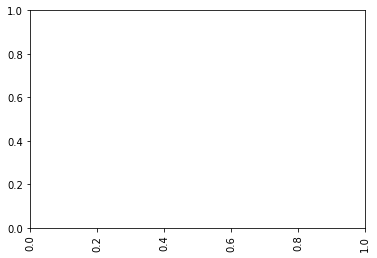

In [ ]:
#train_NaN = pd.DataFrame(y_train).isna().sum().to_dict()
train_NaN = X_train.isna().sum().to_dict()
plt.xticks(rotation=90)
# plt.bar(train_NaN.keys(), train_NaN.values(), align='edge')
print(train_NaN)

In [ ]:
X_train.head()

NameError: ignored

In [ ]:
EMBEDDING_FILE = './glove.twitter.27B.200d.txt'
glove_file = "glove.6B.50d.txt"
encoding="utf-8"
TRAIN_SET_PATH = "r8-no-stop.txt"

In [ ]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import os

In [ ]:
embeddings_dict = {}
with open(glove_file, 'r', encoding="utf-8") as f:
  for line in f:
      values = line.split()
      word = values[0]
      vector = np.asarray(values[1:], "float32")
      embeddings_dict[word] = vector


In [ ]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [ ]:
#find_closest_embeddings(embeddings_dict['king'])

In [ ]:
find_closest_embeddings(embeddings_dict["king"])[1:6]

['prince', 'queen', 'uncle', 'ii', 'grandson']

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(embeddings_dict.keys())               #Converts embeddings_dict ot lsit
vectors = [embeddings_dict[word] for word in words] #list comprehension

Y = tsne.fit_transform(vectors[900:1000])


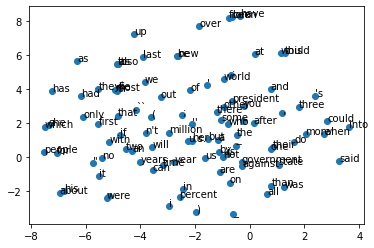

In [ ]:
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
!python3 -m pip install pyspellchecker
from spellchecker import SpellChecker
#import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
#nltk.download("stopwords")

stop_words = stopwords.words("english")

#############################
### Get Data ##

#df=pd.concat([traindata2,testdata2])
dftrain=traindata2
dftest = testdata2
spell = SpellChecker()
def correct_spellings(x, spell=spell):
    """correct the missplled words of a given tweet"""
    x = x.split()
    misspelled = spell.unknown(x)
    result = map(lambda word : spell.correction(word) if word in  misspelled else word, x)
    return " ".join(result)

def tweets_cleaning(x, correct_spelling=True, remove_emojis=True, remove_stop_words=True):
    """Apply function to a clean a tweet"""
    x = x.lower().strip()
    # romove urls
    url = re.compile(r'https?://\S+|www\.\S+')
    x = url.sub(r'',x)
    # remove html tags
    html = re.compile(r'<.*?>')
    x = html.sub(r'',x)
    # remove punctuation
    operator = str.maketrans('','',string.punctuation) #????
    x = x.translate(operator)
    if correct_spelling:
        x = correct_spellings(x)
    if remove_emojis:
        x = x.encode('ascii', 'ignore').decode('utf8').strip()
    if remove_stop_words:
        x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    return x


## APPLY the cleaning function to the text column
dftrain['clean_statement'] = dftrain['statement'].apply(pre_process_text)
dftest['clean_statement'] = dftest['statement'].apply(pre_process_text)


In [ ]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
from collections import  Counter
stop=set(stopwords.words('english'))
import re
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam

In [ ]:
dftrainnew = dftrain.drop(['json ID', 'speaker', 'subject', 'speaker_job_title', 'state_info', 'party', 'los'], axis = 1)
dftestnew = dftest.drop(['json ID', 'speaker', 'subject', 'speaker_job_title', 'state_info', 'party', 'los'], axis = 1)

In [ ]:
dfnew.head()
label_map = {'false': '0', 'half-true': '0', 'mostly-true': '1', 'true': '1', 'barely-true': '0', 'pants-fire': '0'}
dftrainnew['label'] = dftrainnew['label'].map(label_map)
dftestnew['label'] = dftestnew['label'].map(label_map)


In [ ]:
dftrainnew.head()

,label,statement,barely true,false,half true,mostly true,pants on fire,clean_statement
0,0,Says the Annies List political group supports ...,0.0,1.0,0.0,0.0,0.0,says annies list political group supports thir...
1,0,When did the decline of coal start? It started...,0.0,0.0,1.0,1.0,0.0,decline coal start started natural gas took st...
2,1,"Hillary Clinton agrees with John McCain ""by vo...",70.0,71.0,160.0,163.0,9.0,hillary clinton agrees john mccain voting give...
3,0,Health care reform legislation is likely to ma...,7.0,19.0,3.0,5.0,44.0,health care reform legislation likely mandate ...
4,0,The economic turnaround started at the end of ...,15.0,9.0,20.0,19.0,2.0,economic turnaround started end term


In [ ]:
dftrainnew.shape

(10240, 8)

In [ ]:
dftestnew.shape

(1267, 8)

In [ ]:
train = dfnew[~dfnew['label'].isna()]
#X_train, X_val, y_train, y_val = train_test_split(train, train['label'], test_size=0.2, random_state=42)
X_train = dftrainnew
X_val = dftestnew
y_train = dftrainnew['label']
y_val = dftestnew['label']

In [ ]:
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.preprocessing import text

# Limit on the number of features to K features.
TOP_K = 20000

# Limit on the length of text sequences. 
# Sequences longer than this will be truncated.
# and less than it will be padded
MAX_SEQUENCE_LENGTH = 50

class CustomTokenizer:
    def __init__(self, train_texts):
        self.train_texts = train_texts
        self.tokenizer = Tokenizer(num_words=TOP_K)
        
    def train_tokenize(self):
        # Get max sequence length.
        max_length = len(max(self.train_texts , key=len))
        self.max_length = min(max_length, MAX_SEQUENCE_LENGTH)
    
        # Create vocabulary with training texts.
        self.tokenizer.fit_on_texts(self.train_texts)
        
    def vectorize_input(self, tweets):
        # Vectorize training and validation texts.
        
        tweets = self.tokenizer.texts_to_sequences(tweets)
        # Fix sequence length to max value. Sequences shorter than the length are
        # padded in the beginning and sequences longer are truncated
        # at the beginning.
        tweets = sequence.pad_sequences(tweets, maxlen=self.max_length, truncating='post',padding='post')
        return tweets
    
tokenizer = CustomTokenizer(train_texts = X_train['clean_statement'])
# fit o the train
tokenizer.train_tokenize()
tokenized_Xtrain = tokenizer.vectorize_input(X_train['clean_statement'])
tokenized_Xval = tokenizer.vectorize_input(X_val['clean_statement'])
#tokenized_val = tokenizer.vectorize_input(X_val['clean_statement'])
#tokenized_test = tokenizer.vectorize_input(X_test['clean_statement'])

In [ ]:
X_train.head

<bound method NDFrame.head of       label  ...                                    clean_statement
0         0  ...  says annies list political group supports thir...
1         0  ...  decline coal start started natural gas took st...
2         1  ...  hillary clinton agrees john mccain voting give...
3         0  ...  health care reform legislation likely mandate ...
4         0  ...               economic turnaround started end term
...     ...  ...                                                ...
10235     1  ...  larger number shark attacks florida cases vote...
10236     1  ...   democrats become party atlanta metro area blacks
10237     0  ...  says alternative social security operates galv...
10238     0  ...      lifting us cuban embargo allowing travel cuba
10239     0  ...  department veterans affairs manual telling vet...

[10240 rows x 8 columns]>

In [ ]:
glove_file = "glove.6B.50d.txt"
import tqdm

EMBEDDING_VECTOR_LENGTH = 50 # <=200
def construct_embedding_matrix(glove_file, word_index):
    embedding_dict = {}
    with open(glove_file,'r') as f:
        for line in f:
            values=line.split()
            # get the word
            word=values[0]
            if word in word_index.keys():
                # get the vector
                vector = np.asarray(values[1:], 'float32')
                embedding_dict[word] = vector
    ###  oov words (out of vacabulary words) will be mapped to 0 vectors

    num_words=len(word_index)+1
    #initialize it to 0
    embedding_matrix=np.zeros((num_words, EMBEDDING_VECTOR_LENGTH))

    for word,i in tqdm.tqdm(word_index.items()):
        if i < num_words:
            vect=embedding_dict.get(word, [])
            if len(vect)>0:
                embedding_matrix[i] = vect[:EMBEDDING_VECTOR_LENGTH]
    return embedding_matrix
  
embedding_matrix =  construct_embedding_matrix(glove_file, tokenizer.tokenizer.word_index)

100%|██████████| 13289/13289 [00:00<00:00, 476797.51it/s]


In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
from keras.layers import Dropout

In [ ]:
y_val

0       1
1       0
2       0
3       0
4       0
       ..
1262    0
1263    0
1264    0
1265    0
1266    0
Name: label, Length: 1267, dtype: object

In [ ]:
X_val.shape

(1267, 8)

In [ ]:
y_val = y_val.astype('int64')
y_train = y_train.astype('int64')

In [ ]:
EMBEDDING_VECTOR_LENGTH = 50

In [ ]:
model=Sequential()

embedding=Embedding(len(tokenizer.tokenizer.word_index)+1, # number of unique tokens
                    EMBEDDING_VECTOR_LENGTH, #number of features
                    embeddings_initializer=Constant(embedding_matrix), # initialize 
                    input_length=MAX_SEQUENCE_LENGTH, 
                    trainable=False)

model.add(embedding)
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.5))
model.add(Dense(1, activation='relu'))
optimzer = Adam(clipvalue=0.5) # clip value to avoid the gradient exploding

model.compile(optimizer=optimzer, 
              loss='binary_crossentropy', 
              metrics=['acc',f1_m,precision_m, recall_m])

# fit the model
#model.to(torch.device('cuda'))

history = model.fit(tokenized_Xtrain, y_train, 
                    batch_size=32, 
                    epochs=20, 
                    validation_data=(tokenized_Xval,y_val), 
                    verbose=2)

Epoch 1/20
320/320 - 16s - loss: 0.6806 - acc: 0.6447 - f1_m: 0.0010 - precision_m: 0.0062 - recall_m: 5.4451e-04 - val_loss: 0.6522 - val_acc: 0.6464 - val_f1_m: 0.0031 - val_precision_m: 0.0250 - val_recall_m: 0.0017
Epoch 2/20
320/320 - 13s - loss: 0.6515 - acc: 0.6428 - f1_m: 0.0065 - precision_m: 0.0216 - recall_m: 0.0044 - val_loss: 0.6468 - val_acc: 0.6456 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 3/20
320/320 - 13s - loss: 0.6424 - acc: 0.6471 - f1_m: 0.1063 - precision_m: 0.2161 - recall_m: 0.0815 - val_loss: 0.6359 - val_acc: 0.6448 - val_f1_m: 0.0000e+00 - val_precision_m: 0.0000e+00 - val_recall_m: 0.0000e+00
Epoch 4/20
320/320 - 13s - loss: 0.6411 - acc: 0.6395 - f1_m: 0.0829 - precision_m: 0.1885 - recall_m: 0.0649 - val_loss: 0.6322 - val_acc: 0.6567 - val_f1_m: 0.3381 - val_precision_m: 0.5341 - val_recall_m: 0.2590
Epoch 5/20
320/320 - 13s - loss: 0.6369 - acc: 0.6393 - f1_m: 0.1449 - precision_m: 0.3137 - recall_m: 0.1074 - 

In [ ]:
loss, accuracy, f1_score, precision, recall = model.evaluate(tokenized_Xval, y_val, verbose=0)

In [ ]:
pred = model.predict_proba(tokenized_Xval)

In [ ]:

pred = [0 if x[0] < 0.5 else 1 for x in pred ]

In [ ]:
print(pred)

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 

In [ ]:
print(f"accuracy: {'%.3f'%accuracy}")
print(f"f1score: {'%.3f'%f1_score}")
print(f"precision: {'%.3f'%precision}")
print(f"recall: {'%.3f'%recall}")


accuracy: 0.650
f1score: 0.427
precision: 0.494
recall: 0.391


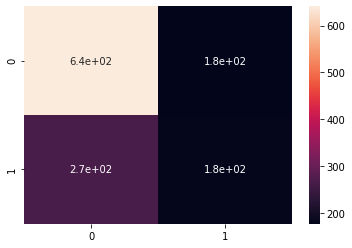

In [ ]:
disp = confusion_matrix(y_val, pred)
import seaborn 
seaborn.heatmap(disp, annot = True)